# Data Mining (2024-2025): Part 1 - Sonar Object Classification
by Ahmad Bafakih <br>

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Dataset Exploration and Preparation

In [30]:
# load in train and test dataset 
sonar_train = pd.read_csv('./sonar_dataset/sonar_train.csv')
sonar_test = pd.read_csv('./sonar_dataset/sonar_test.csv')

# print dataset sizes
print('Train dataset shape:', sonar_train.shape)
print('Test dataset shape:', sonar_test.shape)

# show first 5 samples
sonar_train.head()

Train dataset shape: (139, 61)
Test dataset shape: (69, 61)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


As illustrated above, the train dataset has 139 samples whereas the test dataset has 69. Both feature 61 attributes which include 60 numerical/quantitative  attributes and one class attribute "Class". The class column has categories "M" for Metal Cylinder and "R" for Rock. 

Subsequently, the class column will be used as our target variables for a binary classification task where "M" represents the positive class. 

In [3]:
# check if there are any null values in train dataset
sonar_train.isnull().sum().sum()

0

In [4]:
# check if there are any null values in train dataset
sonar_test.isnull().sum().sum()

0

With having both datasets checked for null values and none were found, we can proceed with splitting the data into train-test sets accordingly. Since both datasets include the 'class' attribute, we will isolate this column as the target variable (y-values), while the remaining columns will be used as features in the training set.

In [5]:
# Data splitting
# train splits
sonar_train_y = sonar_train['Class']
sonar_train_X = sonar_train.drop('Class', axis=1)

# test splits
sonar_test_y = sonar_test['Class']
sonar_test_X = sonar_test.drop('Class', axis=1)

In [6]:
print('sonar_train_X shape:', sonar_train_X.shape)
print('sonar_train_y shape:', sonar_train_y.shape, '\n')
print('sonar_test_X shape:', sonar_test_X.shape)
print('sonar_test_y shape:', sonar_test_y.shape)

sonar_train_X shape: (139, 60)
sonar_train_y shape: (139,) 

sonar_test_X shape: (69, 60)
sonar_test_y shape: (69,)


## Build Functions

In [1]:
class simple_nearest_neighbour:
    # class constructor 
    def __init__(self):
        pass

    # fit data method 
    def fit(self, X_train, y_train):
        # define pointers X_train, y_train that point to original datasets
        self.X_train = X_train
        self.y_train = y_train

    # predict method
    # The Euclidean distance is a special case of the Minkowski distance where the power is set to 2
    # by default we will measure the The Euclidean distance
    def predict(self, X_test, power_q=2):
        predictions = []
        for i in range(X_test.shape[0]):
            # 1. for sample i measure its distance against every train sample
            mink_distance = np.sum(np.abs(self.X_train - X_test.iloc[i].values) ** power_q, axis=1) ** (1/power_q)
            # 2. grab index of minimum distance
            nearest_distance = np.argmin(mink_distance)
            # 3. append to predictions the label at index nearest_distance to classify the sample
            predictions.append(self.y_train[nearest_distance])
            
        return np.array(predictions)

In [8]:
def scores(y_true, y_pred):
    print('Accuracy score:', accuracy_score(y_true, y_pred))
    print('Recall score: ', recall_score(y_true, y_pred, pos_label='M'))
    print('Precision score: ', precision_score(y_true, y_pred, pos_label='M'))
    print('f1 score score: ', f1_score(y_true, y_pred, pos_label='M'))

In [9]:
def grid_scores(y_true, y_pred):
    return (accuracy_score(y_true, y_pred), 
    recall_score(y_true, y_pred, pos_label='M'), 
    precision_score(y_true, y_pred, pos_label='M'), 
    f1_score(y_true, y_pred, pos_label='M'))

In [10]:
def plot(title, ylabel, x_axis, y_axis):
    plt.clf()
    plt.title(title)
    plt.xlabel("Power P")
    plt.ylabel(ylabel)
    plt.plot(x_axis, y_axis, linestyle='-')
    plt.show() 

## Model Evaluation
### Model 1: Euclidean distance

In [11]:
# define model and fit to training data
SNN = simple_nearest_neighbour()
SNN.fit(sonar_train_X, sonar_train_y)
# by default power q is 2 hence we can simply pass the test data alone
predictions = SNN.predict(sonar_test_X)
scores(sonar_test_y, predictions)

Accuracy score: 0.8985507246376812
Recall score:  0.972972972972973
Precision score:  0.8571428571428571
f1 score score:  0.9113924050632911


### Model 2: Manhatten distance

In [12]:
# define model and fit to training data
SNN = simple_nearest_neighbour()
SNN.fit(sonar_train_X, sonar_train_y)
# set power q to 1 converting the distance into manhatten distance
predictions = SNN.predict(sonar_test_X, power_q=1) 
scores(sonar_test_y, predictions)

Accuracy score: 0.8840579710144928
Recall score:  0.9459459459459459
Precision score:  0.8536585365853658
f1 score score:  0.8974358974358975


## Grid Search for Best Power "Q"

In [20]:
# define dic that will hold scores
results = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for i in range(1, 21):
    # define model and fit to training data
    SNN = simple_nearest_neighbour()
    SNN.fit(sonar_train_X, sonar_train_y)
    predictions = SNN.predict(sonar_test_X, power_q=i)
    # grid_scores returns a tuple in the order accuracy_score, recall_score, precision_score, and f1_score
    scores = grid_scores(sonar_test_y, predictions)

    # append scores into dic accordingly
    results['accuracy'].append(scores[0])
    results['precision'].append(scores[1])
    results['recall'].append(scores[2])
    results['f1'].append(scores[3])

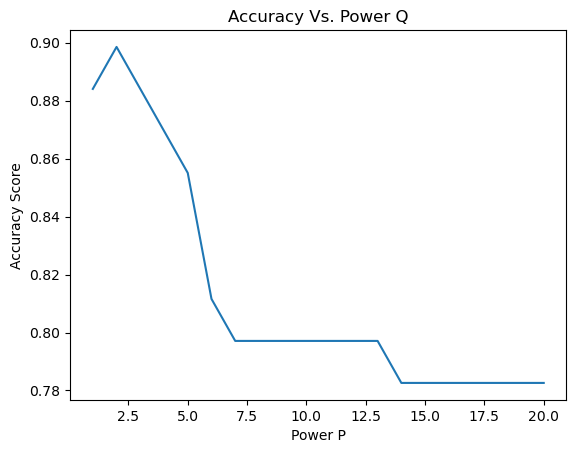

In [21]:
# define x axis value for plots
x_axis = list(range(1, 21))

# accuracy plot
plot('Accuracy Vs. Power Q', 'Accuracy Score', x_axis, results['accuracy'])

In [26]:
# add 1 as indexing starts at 0 (0-19)
best_q = np.argmax(results['accuracy']) + 1
print('Best accuracy on q:', best_q)
print('Achieved accuracy:', results['accuracy'][1])

Best accuracy on q: 2
Achieved accuracy: 0.8985507246376812


The plot above shows there has been a consistent decrease in accuracy as power q grows. The value of q with the best accuracy is 2 otherwise known as the euclidean distance.

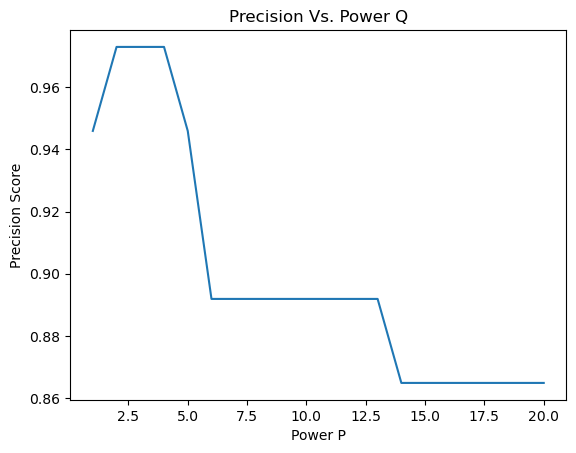

In [27]:
plot('Precision Vs. Power Q', 'Precision Score', x_axis, results['precision'])

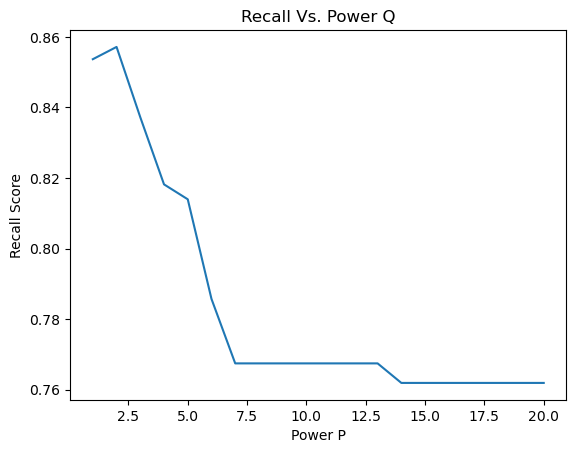

In [28]:
plot('Recall Vs. Power Q', 'Recall Score', x_axis, results['recall'])

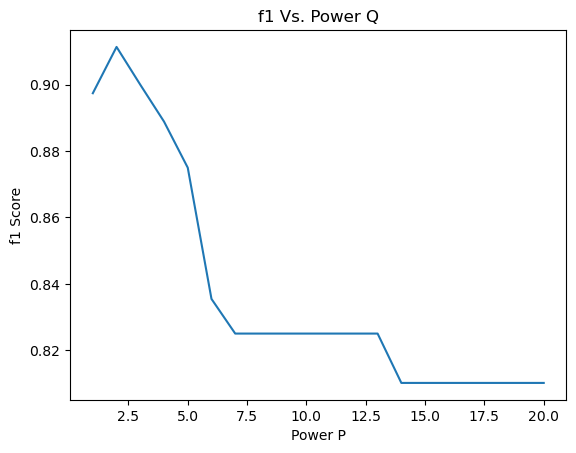

In [29]:
plot('f1 Vs. Power Q', 'f1 Score', x_axis, results['f1'])